In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as stats

import sklearn.linear_model as skl_lm
from sklearn.metrics import confusion_matrix, classification_report, \
precision_score, accuracy_score, plot_roc_curve, RocCurveDisplay, \
ConfusionMatrixDisplay, roc_auc_score,roc_curve
from sklearn import preprocessing
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

import statsmodels.formula.api as smf

%matplotlib inline
plt.style.use('seaborn-white')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Data

In [3]:
#get the data
!git clone https://git.wur.nl/dijk097/ml2022_projectmbf.git data
#read csvfile
data = pd.read_csv('data/data_labeled_fixed.csv')
#remove - in name
data.columns = data.columns.str.replace("-", "")
dataweek1=data.drop(data.columns[-2],axis=1)


Cloning into 'data'...
remote: Enumerating objects: 38, done.
remote: Total 38 (delta 0), reused 0 (delta 0), pack-reused 38
Unpacking objects: 100% (38/38), done.


In [ ]:
#dataweek1['class1'] = np.asarray([1 if x  == 'Cone Bipolar OFF' else 0 for x in dataweek1.CLASS])
dataweek1.columns


Index(['Acin1', 'Actb', 'Agap1', 'Ahi1', 'Akap11', 'Akap9', 'Aldoa', 'Aldoc',
       'Ankrd12', 'Anp32a',
       ...
       'Zranb2', 'mtCo1', 'mtCytb', 'mtNd1', 'mtNd2', 'mtNd4', 'mtNd5',
       'mtRnr1', 'mtRnr2', 'CLASS'],
      dtype='object', length=453)

In [ ]:
dataweek1.CLASS == 'Rod Bipolar'

0       False
1       False
2       False
3       False
4       False
        ...  
3719    False
3720    False
3721    False
3722    False
3723    False
Name: CLASS, Length: 3724, dtype: bool

## Logistic regres. Cone Bipolar OFF vs. the res

In [ ]:
# select data with higher expression, 
x = dataweek1.drop(["CLASS"],axis=1)
x = x[x.columns[x.mean() > 2]]
print(x.shape)



(3724, 22)


In [ ]:
y = np.asarray([1 if x  == 'Cone Bipolar OFF' else 0 for x in dataweek1.CLASS])
print(y.shape)

(3724,)


In [ ]:

# Split into training and test
x_train_cone_off, x_test_cone_off, y_train_cone_off, y_test_cone_off = train_test_split(x, y, random_state=1)
#print(y_test)


In [ ]:
# run the model on training data
glm_model_cone_off = stats.GLM(y_train_cone_off, stats.add_constant(x_train_cone_off), family=stats.families.Binomial())
glm_fit_cone_off = glm_model_cone_off.fit()
print(glm_fit_cone_off.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 2793
Model:                            GLM   Df Residuals:                     2770
Model Family:                Binomial   Df Model:                           22
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -623.92
Date:                Sun, 20 Feb 2022   Deviance:                       1247.8
Time:                        11:05:26   Pearson chi2:                 7.47e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8818      0.247      3.573      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
# Use on the test data
glm_probs_cone_off = glm_fit_cone_off.predict(stats.add_constant(x_test_cone_off))


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


#### Confusion Matrix

In [ ]:
glm_preds_cone_off = np.asarray([1 if x > 0.5 else 0 for x in glm_probs_cone_off])
glm_preds_cone_off.shape

(931,)

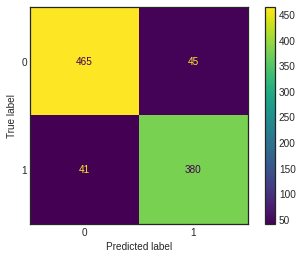

In [ ]:
#conf_m = pd.DataFrame(confusion_matrix(y_true=y_test, y_pred=glm_preds, labels=np.unique(y_test)).T)
#conf_m.index.name = 'Predicted'
#conf_m.columns.name = 'True'
#conf_m
cm_cone_off = confusion_matrix(y_test_cone_off, glm_preds_cone_off)
cm__cone_off_display = ConfusionMatrixDisplay(cm_cone_off).plot()

In [ ]:
print(np.mean(glm_preds_cone_off == y_test_cone_off))
print(np.mean(glm_preds_cone_off != y_test_cone_off))

0.907626208378088
0.09237379162191192


## Cone Bipolar ON vs. the rest

In [ ]:
y = np.asarray([1 if x  == 'Cone Bipolar ON' else 0 for x in dataweek1.CLASS])
print(y.shape)

(3724,)


In [ ]:
# Split into training and test
x_train_cone_on, x_test_cone_on, y_train_cone_on, y_test_cone_on = train_test_split(x, y, random_state=1)
#print(y_test)


In [ ]:
# run the model on training data
glm_model_cone_on = stats.GLM(y_train_cone_on, stats.add_constant(x_train_cone_on), family=stats.families.Binomial())
glm_fit_cone_on = glm_model_cone_on.fit()
print(glm_fit_cone_on.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 2793
Model:                            GLM   Df Residuals:                     2770
Model Family:                Binomial   Df Model:                           22
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -540.56
Date:                Sun, 20 Feb 2022   Deviance:                       1081.1
Time:                        11:05:40   Pearson chi2:                 3.70e+06
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.8690      0.270     -3.215      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
# Use on the test data
glm_probs_cone_on = glm_fit_cone_on.predict(stats.add_constant(x_test_cone_on))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


### Confusion matrix

In [ ]:
glm_preds_cone_on = np.asarray([1 if x > 0.5 else 0 for x in glm_probs_cone_on])
glm_preds_cone_on.shape

(931,)

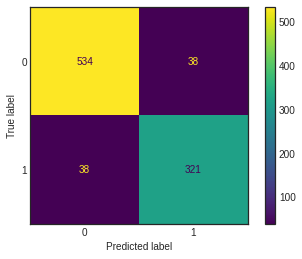

In [ ]:
#conf_m = pd.DataFrame(confusion_matrix(y_true=y_test, y_pred=glm_preds, labels=np.unique(y_test)).T)
#conf_m.index.name = 'Predicted'
#conf_m.columns.name = 'True'
#conf_m
cm_cone_on = confusion_matrix(y_test_cone_on, glm_preds_cone_on)
cm__cone_on_display = ConfusionMatrixDisplay(cm_cone_on).plot()

In [ ]:
print(np.mean(glm_preds_cone_on == y_test_cone_on))
print(np.mean(glm_preds_cone_on != y_test_cone_on))

0.9183673469387755
0.08163265306122448


## Amacrine vs. the rest

In [ ]:
y = np.asarray([1 if x  == 'Amacrine' else 0 for x in dataweek1.CLASS])

In [ ]:
# Split into training and test
x_train_amacrine, x_test_amacrine, y_train_amacrine, y_test_amacrine = train_test_split(x, y, random_state=1)
#print(y_test)

In [ ]:
# run the model on training data
glm_model_amacrine = stats.GLM(y_train_amacrine, stats.add_constant(x_train_amacrine), family=stats.families.Binomial())
glm_fit_amacrine = glm_model_amacrine.fit()
print(glm_fit_amacrine.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 2793
Model:                            GLM   Df Residuals:                     2770
Model Family:                Binomial   Df Model:                           22
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -110.73
Date:                Sun, 20 Feb 2022   Deviance:                       221.46
Time:                        11:05:56   Pearson chi2:                 6.40e+03
No. Iterations:                    11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.9411      0.659     -2.944      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
# Use on the test data
glm_probs_amacrine = glm_fit_amacrine.predict(stats.add_constant(x_test_amacrine))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
glm_preds_amacrine = np.asarray([1 if x > 0.5 else 0 for x in glm_probs_amacrine])
glm_preds_amacrine.shape

(931,)

#### Confusion Matrix

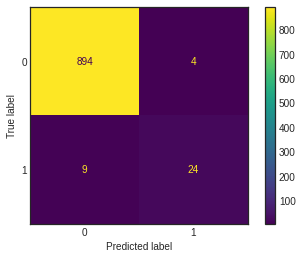

In [ ]:
#conf_m = pd.DataFrame(confusion_matrix(y_true=y_test, y_pred=glm_preds, labels=np.unique(y_test)).T)
#conf_m.index.name = 'Predicted'
#conf_m.columns.name = 'True'
#conf_m
cm_amacrine = confusion_matrix(y_test_amacrine, glm_preds_amacrine)
cm_display_amacrine = ConfusionMatrixDisplay(cm_amacrine).plot()

In [ ]:
print(np.mean(glm_preds_amacrine == y_test_amacrine))
print(np.mean(glm_preds_amacrine != y_test_amacrine))

0.9860365198711063
0.013963480128893663


##  Rod Bipolar vs. the rest

In [ ]:
y = np.asarray([1 if x  == 'Rod Bipolar' else 0 for x in dataweek1.CLASS])


In [ ]:
# Split into training and test
x_train_rod, x_test_rod, y_train_rod, y_test_rod = train_test_split(x, y, random_state=1)
#print(y_test)

In [ ]:
# run the model on training data
glm_model_rod = stats.GLM(y_train_rod, stats.add_constant(x_train_rod), family=stats.families.Binomial())
glm_fit_rod = glm_model_rod.fit()
print(glm_fit_rod.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 2793
Model:                            GLM   Df Residuals:                     2770
Model Family:                Binomial   Df Model:                           22
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -69.364
Date:                Sun, 20 Feb 2022   Deviance:                       138.73
Time:                        11:06:10   Pearson chi2:                     476.
No. Iterations:                    11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.3190      0.931     -5.712      0.0

In [ ]:
# Use on the test data
glm_probs_rod = glm_fit_rod.predict(stats.add_constant(x_test_rod))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
glm_preds_rod = np.asarray([1 if x > 0.5 else 0 for x in glm_probs_rod])
glm_preds_rod.shape

(931,)

#### Confusion Matrix

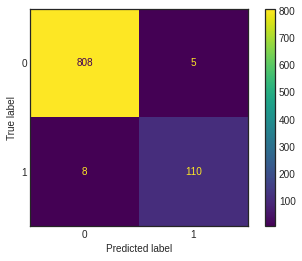

In [ ]:
#conf_m = pd.DataFrame(confusion_matrix(y_true=y_test, y_pred=glm_preds, labels=np.unique(y_test)).T)
#conf_m.index.name = 'Predicted'
#conf_m.columns.name = 'True'
#conf_m
cm_rod = confusion_matrix(y_test_rod, glm_preds_rod)
cm_display_rod = ConfusionMatrixDisplay(cm_rod).plot()

In [ ]:
print(np.mean(glm_preds_rod == y_test_rod))
print(np.mean(glm_preds_rod != y_test_rod))

0.9860365198711063
0.013963480128893663


In [ ]:
print("Accuracy", accuracy_score(y_test_rod, glm_preds_rod))

NameError: ignored

## Models Predictive Performance

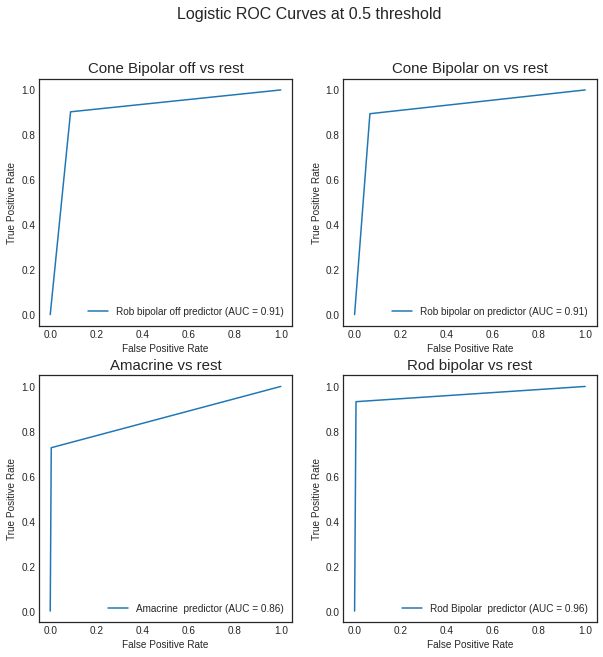

In [ ]:

fig, axes = plt.subplots(2, 2, figsize=(10, 10))

#Cone bipolar off
fpr_cone_off, tpr_cone_off, _ = roc_curve(y_test_cone_off,  glm_preds_cone_off)
auc_cone_off = roc_auc_score(y_test_cone_off, glm_preds_cone_off)
RocCurveDisplay(fpr=fpr_cone_off, tpr=tpr_cone_off,  roc_auc=auc_cone_off,estimator_name='Rob bipolar off predictor').plot(ax=axes[0,0])
axes[0, 0].set_title("Cone Bipolar off vs rest", fontsize=15)

# cone bipolar on
fpr_cone_on, tpr_cone_on, _ = roc_curve(y_test_cone_on,  glm_preds_cone_on)
auc_cone_on = roc_auc_score(y_test_cone_on, glm_preds_cone_on)
RocCurveDisplay(fpr=fpr_cone_on, tpr=tpr_cone_on,  roc_auc=auc_cone_on,estimator_name='Rob bipolar on predictor').plot(ax=axes[0,1])
axes[0, 1].set_title("Cone Bipolar on vs rest", fontsize=15)

# amcrine
fpr_amacrine, tpr_amacrine, _ = roc_curve(y_test_amacrine,  glm_preds_amacrine)
auc_amacrine = roc_auc_score(y_test_amacrine, glm_preds_amacrine)
RocCurveDisplay(fpr=fpr_amacrine, tpr=tpr_amacrine,  roc_auc=auc_amacrine,estimator_name='Amacrine  predictor').plot(ax=axes[1,0])
axes[1, 0].set_title("Amacrine vs rest", fontsize=15)

# Rod bipolar
fpr_rod, tpr_rod, _ = roc_curve(y_test_rod,  glm_preds_rod)
auc_rod = roc_auc_score(y_test_rod, glm_preds_rod)
RocCurveDisplay(fpr=fpr_rod, tpr=tpr_rod,  roc_auc=auc_rod,estimator_name='Rod Bipolar  predictor').plot(ax=axes[1,1])
axes[1, 1].set_title("Rod bipolar vs rest", fontsize=15)
fig.suptitle('Logistic ROC Curves at 0.5 threshold', fontsize=16)


plt.show()

#KNN

In [4]:
dataweek1["Cone Bipolar OFF"]=np.where(dataweek1['CLASS'] =="Cone Bipolar OFF", 1, 0)
dataweek1["Cone Bipolar ON"]=np.where(dataweek1['CLASS'] =="Cone Bipolar ON", 1, 0)
dataweek1["Amacrine"]=np.where(dataweek1['CLASS'] =="Amacrine", 1, 0)
dataweek1["Rod Bipolar"]=np.where(dataweek1['CLASS'] =="Rod Bipolar", 1, 0)
x = dataweek1.drop(["CLASS"],axis=1)
x = x[x.columns[x.mean() > 2]]
x["Cone Bipolar OFF"]=dataweek1["Cone Bipolar OFF"]
x["Cone Bipolar ON"]=dataweek1["Cone Bipolar ON"]
x["Amacrine"]=dataweek1["Amacrine"]
x['Rod Bipolar']=dataweek1["Rod Bipolar"]

##def the kNN function

In [5]:
def K_nearest (i, X_train, y_train,X_test,y_test):
  knn_model = KNeighborsClassifier(n_neighbors=i)
  knn_fit = knn_model.fit(X_train, y_train)

  # Predict the response on the test data using the fitted LDA model
  y_pred = knn_fit.predict(X_test)

  # Put in a data frame for printing
  y_pred_df = X_test.copy()
  y_pred_df['y_pred'] = y_pred
  y_pred_df

  #predict with the x_test data#
  y_pred_propa = knn_fit.predict_proba(X_test)
  y_pred = knn_fit.predict(X_test)

  # Print both using a data frame
  pd.DataFrame({knn_fit.classes_[0]: y_pred_propa[:, 0], 
                knn_fit.classes_[1]: y_pred_propa[:, 1], 
                'Prediction': y_pred})
  # Compare the predicted and true labels
  y_pred = knn_fit.predict(X_test)
  y_compare = y_pred == y_test

  # Print the accuracy
  accuracy = y_compare.mean()
  print('\nThe accuracy: ', accuracy)
  ac_list.append(accuracy)
  k.append(i)
  # Put in a pandas data frame for printing 
  conf_m = confusion_matrix(y_test, y_pred, labels=knn_fit.classes_)
  conf_pd = pd.DataFrame(conf_m,index=knn_fit.classes_, columns=knn_fit.classes_)
  conf_pd.index.name = 'True'
  conf_pd.columns.name = 'Predicted'
  print(conf_pd)
  conf_m_display = ConfusionMatrixDisplay(conf_m,).plot()
  plt.show()
  #caclulate sensitivity
  TP=conf_pd[1][1]
  FN=conf_pd[1][0]
  TN=conf_pd[0][0]
  FP=conf_pd[0][1]
  print("sensitivity{}".format(TP/(TP+FN)))
  print("Specificity{}".format(TN/(TN+FP)))
  sensitivity.append(TP/(TP+FN))
  Specificity.append(TN/(TN+FP))

In [6]:
train, test = train_test_split(x, random_state=1)
X_train=train[train.columns[:-4]]
X_test=test[test.columns[:-4]]
y_train_Cone_Bipolar_OFF=train["Cone Bipolar OFF"]
y_test_Cone_Bipolar_OFF=test["Cone Bipolar OFF"]

y_train_Cone_Bipolar_ON=train["Cone Bipolar ON"]
y_test_Cone_Bipolar_ON=test["Cone Bipolar ON"]

y_train_Amacrine=train["Amacrine"]
y_test_Amacrine=test["Amacrine"]

y_train_Rod_Bipolar=train["Rod Bipolar"]
y_test_Rod_Bipolar=test["Rod Bipolar"]

*******Cone_Bipolar_OFF*********

The accuracy:  0.8839957035445757
Predicted    0    1
True               
0          447   63
1           45  376


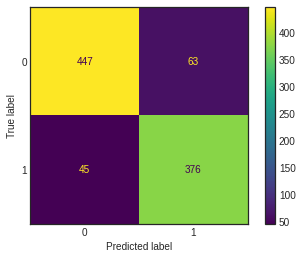

sensitivity0.856492027334852
Specificity0.9085365853658537
*******Cone_Bipolar_ON********

The accuracy:  0.8958109559613319
Predicted    0    1
True               
0          531   41
1           56  303


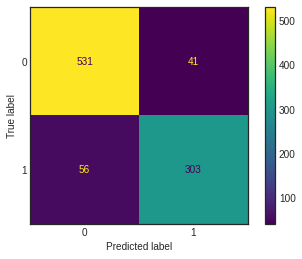

sensitivity0.8808139534883721
Specificity0.9045996592844975
***********Amacrine***********

The accuracy:  0.9688506981740065
Predicted    0  1
True             
0          894  4
1           25  8


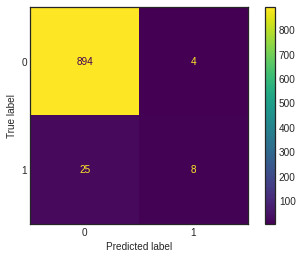

sensitivity0.6666666666666666
Specificity0.9727965179542981
*********Rod_Bipolar**********

The accuracy:  0.9903329752953813
Predicted    0    1
True               
0          807    6
1            3  115


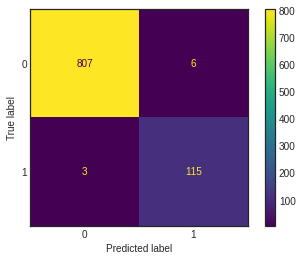

sensitivity0.9504132231404959
Specificity0.9962962962962963


In [7]:
ac_list=[]
k=[]
sensitivity=[] #TP / (TP+FN)
Specificity=[] #TN / (TN+FP)
print("*******Cone_Bipolar_OFF*********")
K_nearest (3, X_train, y_train_Cone_Bipolar_OFF,X_test,y_test_Cone_Bipolar_OFF)
print("*******Cone_Bipolar_ON********")
K_nearest (3, X_train, y_train_Cone_Bipolar_ON,X_test,y_test_Cone_Bipolar_ON)
print("***********Amacrine***********")
K_nearest (3, X_train, y_train_Amacrine,X_test,y_test_Amacrine)
print("*********Rod_Bipolar**********")
K_nearest (3, X_train, y_train_Rod_Bipolar,X_test,y_test_Rod_Bipolar)

##try with different k 


The accuracy:  0.9656283566058003
Predicted    0   1
True              
0          884  14
1           18  15


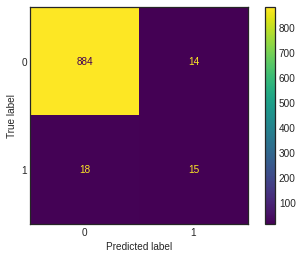

sensitivity0.5172413793103449
Specificity0.9800443458980045

The accuracy:  0.9699248120300752
Predicted    0  1
True             
0          896  2
1           26  7


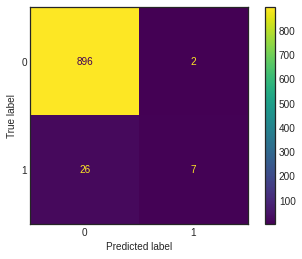

sensitivity0.7777777777777778
Specificity0.9718004338394793

The accuracy:  0.9688506981740065
Predicted    0  1
True             
0          894  4
1           25  8


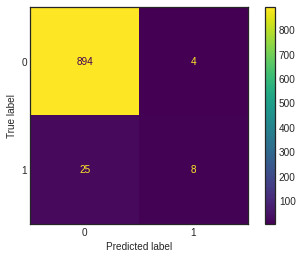

sensitivity0.6666666666666666
Specificity0.9727965179542981

The accuracy:  0.9677765843179377
Predicted    0  1
True             
0          897  1
1           29  4


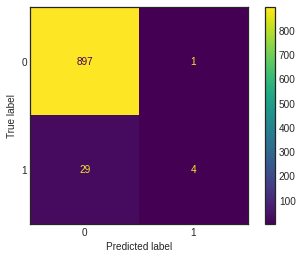

sensitivity0.8
Specificity0.968682505399568

The accuracy:  0.9677765843179377
Predicted    0  1
True             
0          897  1
1           29  4


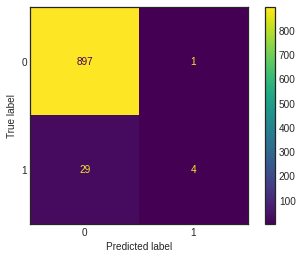

sensitivity0.8
Specificity0.968682505399568

The accuracy:  0.966702470461869
Predicted    0  1
True             
0          898  0
1           31  2


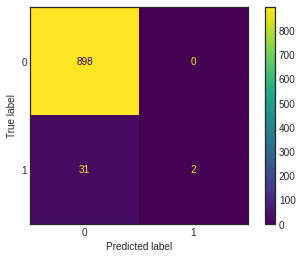

sensitivity1.0
Specificity0.9666307857911733

The accuracy:  0.966702470461869
Predicted    0  1
True             
0          897  1
1           30  3


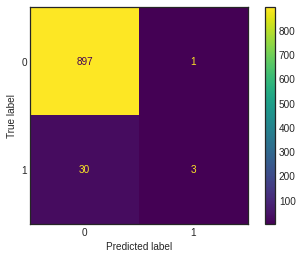

sensitivity0.75
Specificity0.9676375404530745

The accuracy:  0.9656283566058003
Predicted    0  1
True             
0          898  0
1           32  1


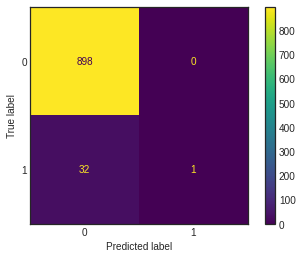

sensitivity1.0
Specificity0.9655913978494624

The accuracy:  0.9656283566058003
Predicted    0  1
True             
0          898  0
1           32  1


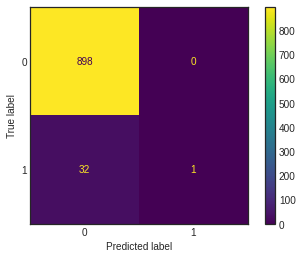

sensitivity1.0
Specificity0.9655913978494624

The accuracy:  0.9656283566058003
Predicted    0  1
True             
0          898  0
1           32  1


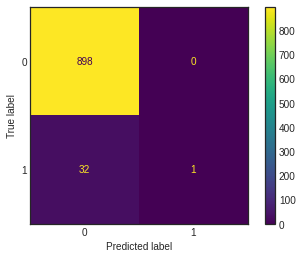

sensitivity1.0
Specificity0.9655913978494624

The accuracy:  0.9656283566058003
Predicted    0  1
True             
0          898  0
1           32  1


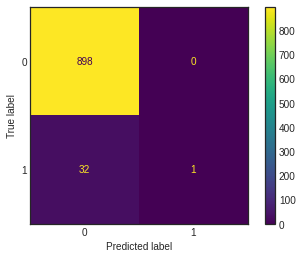

sensitivity1.0
Specificity0.9655913978494624

The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


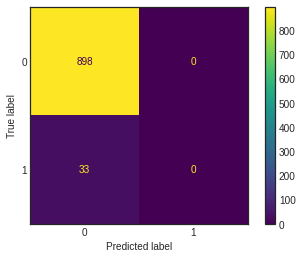

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars


sensitivitynan
Specificity0.9645542427497314

The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


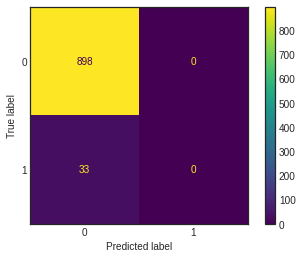

sensitivitynan
Specificity0.9645542427497314


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars



The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


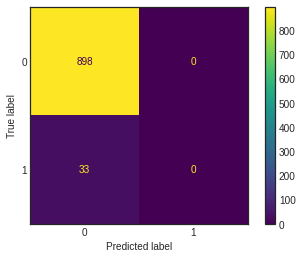

sensitivitynan
Specificity0.9645542427497314


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars



The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


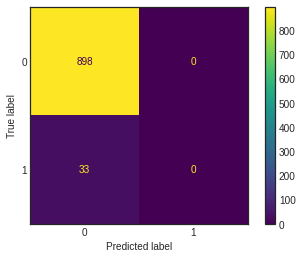

sensitivitynan
Specificity0.9645542427497314


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars



The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


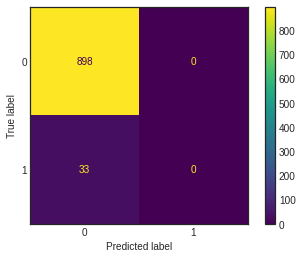

sensitivitynan
Specificity0.9645542427497314


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars



The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


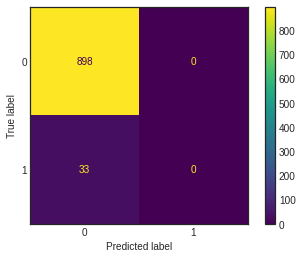

sensitivitynan
Specificity0.9645542427497314


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars



The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


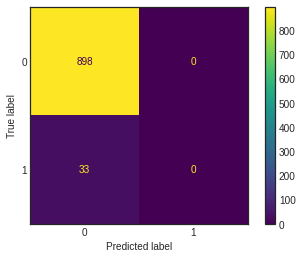

sensitivitynan
Specificity0.9645542427497314


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars



The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


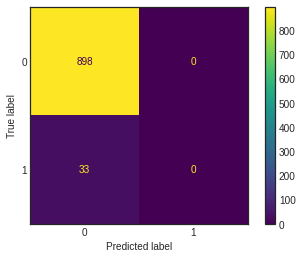

sensitivitynan
Specificity0.9645542427497314


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars



The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


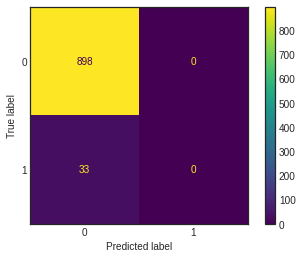

sensitivitynan
Specificity0.9645542427497314


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars



The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


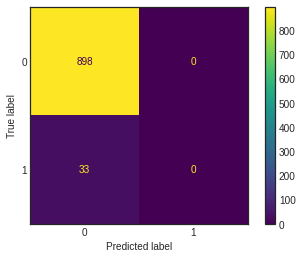

sensitivitynan
Specificity0.9645542427497314


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars



The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


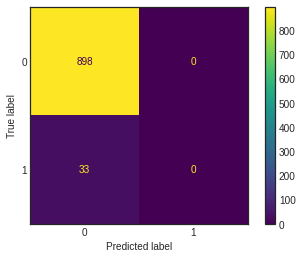

sensitivitynan
Specificity0.9645542427497314


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars



The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


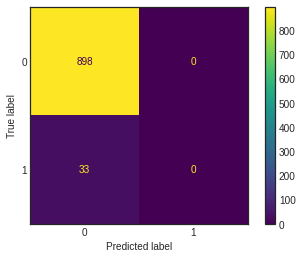

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars


sensitivitynan
Specificity0.9645542427497314

The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


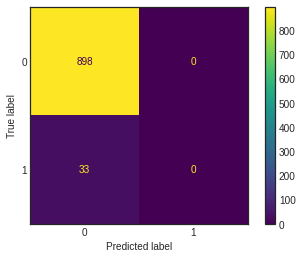

sensitivitynan
Specificity0.9645542427497314


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars



The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


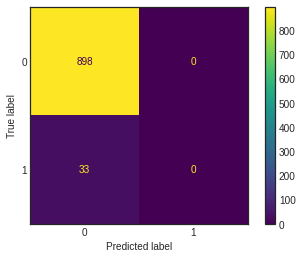

sensitivitynan
Specificity0.9645542427497314


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars



The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


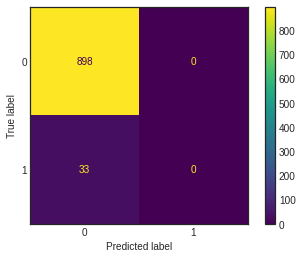

sensitivitynan
Specificity0.9645542427497314


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars



The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


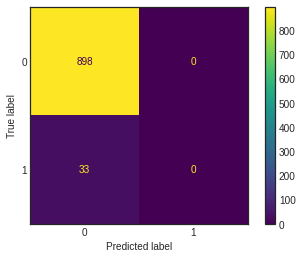

sensitivitynan
Specificity0.9645542427497314


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars



The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


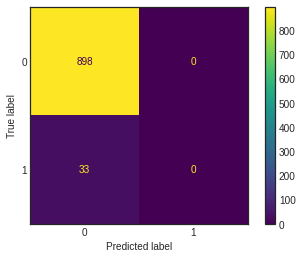

sensitivitynan
Specificity0.9645542427497314


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars



The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


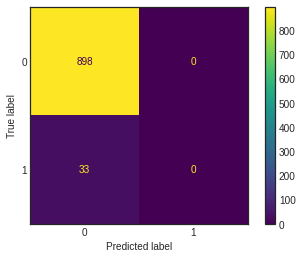

sensitivitynan
Specificity0.9645542427497314


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars



The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


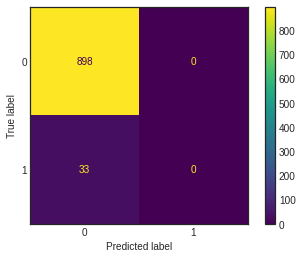

sensitivitynan
Specificity0.9645542427497314


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars



The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


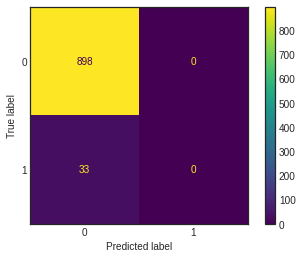

sensitivitynan
Specificity0.9645542427497314


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars



The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


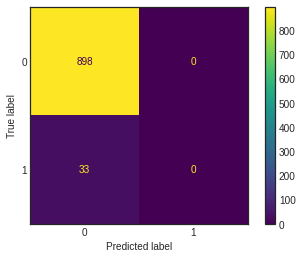

sensitivitynan
Specificity0.9645542427497314


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars



The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


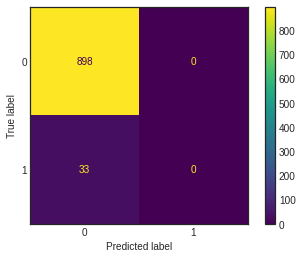

sensitivitynan
Specificity0.9645542427497314


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars



The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


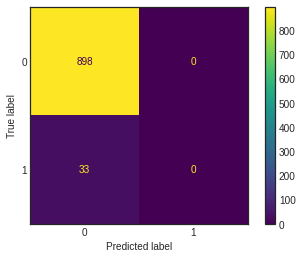

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars


sensitivitynan
Specificity0.9645542427497314

The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


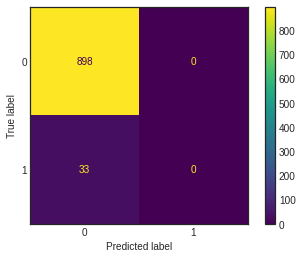

sensitivitynan
Specificity0.9645542427497314


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars



The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


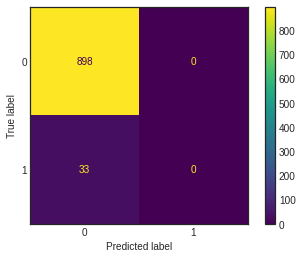

sensitivitynan
Specificity0.9645542427497314


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars



The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


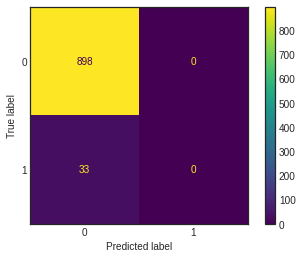

sensitivitynan
Specificity0.9645542427497314


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars



The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


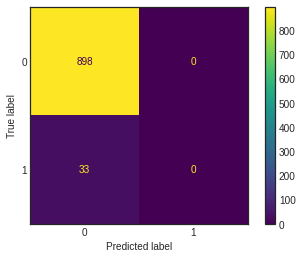

sensitivitynan
Specificity0.9645542427497314


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars



The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


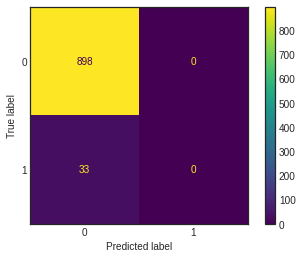

sensitivitynan
Specificity0.9645542427497314


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars



The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


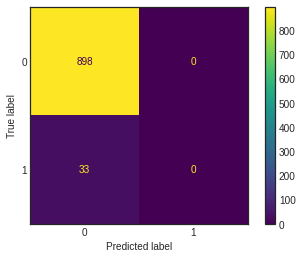

sensitivitynan
Specificity0.9645542427497314


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars



The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


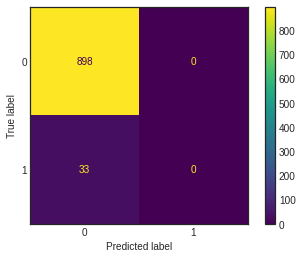

sensitivitynan
Specificity0.9645542427497314


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars



The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


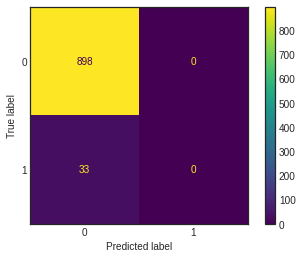

sensitivitynan
Specificity0.9645542427497314


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars



The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


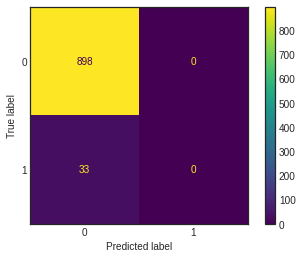

sensitivitynan
Specificity0.9645542427497314


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars



The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


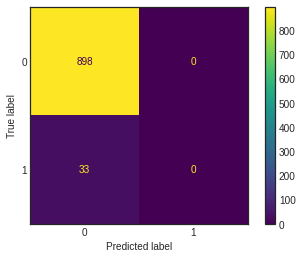

sensitivitynan
Specificity0.9645542427497314


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars



The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


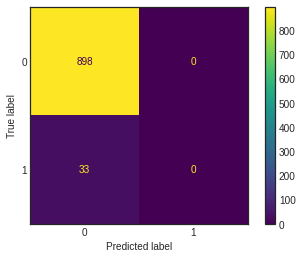

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars


sensitivitynan
Specificity0.9645542427497314

The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


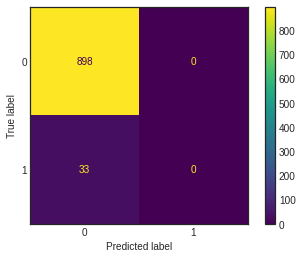

sensitivitynan
Specificity0.9645542427497314


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars



The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


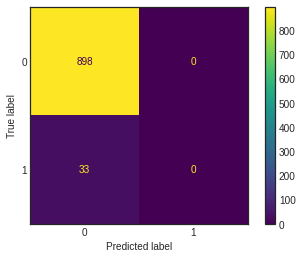

sensitivitynan
Specificity0.9645542427497314


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars



The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


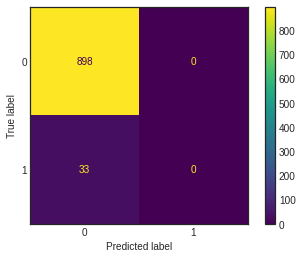

sensitivitynan
Specificity0.9645542427497314


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars



The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


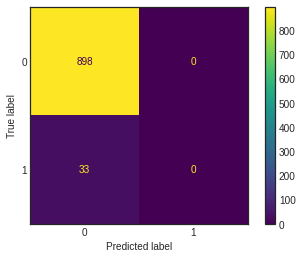

sensitivitynan
Specificity0.9645542427497314


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars



The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


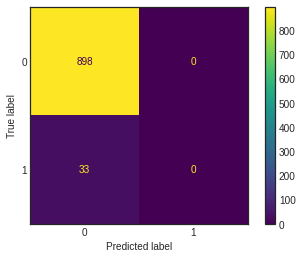

sensitivitynan
Specificity0.9645542427497314


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars



The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


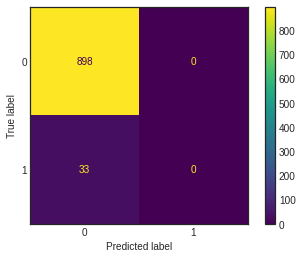

sensitivitynan
Specificity0.9645542427497314


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars



The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


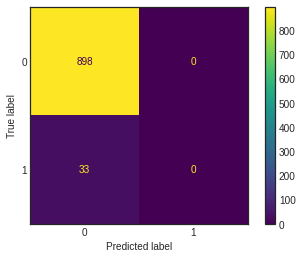

sensitivitynan
Specificity0.9645542427497314


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars



The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


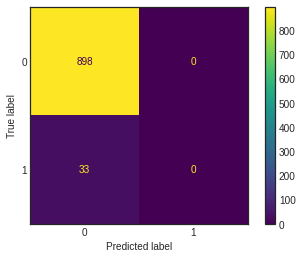

sensitivitynan
Specificity0.9645542427497314


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars



The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


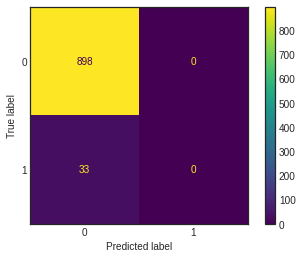

sensitivitynan
Specificity0.9645542427497314


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars



The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


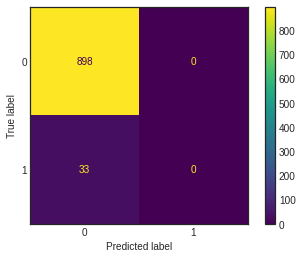

sensitivitynan
Specificity0.9645542427497314


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars



The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


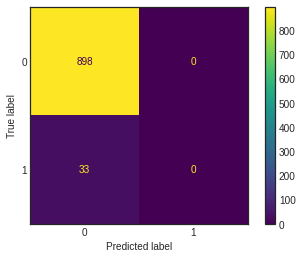

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars


sensitivitynan
Specificity0.9645542427497314

The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


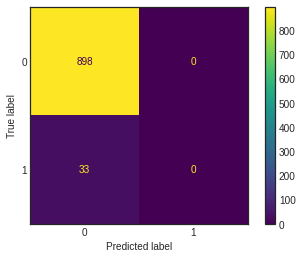

sensitivitynan
Specificity0.9645542427497314


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars



The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


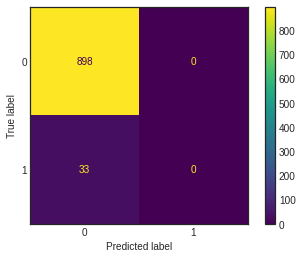

sensitivitynan
Specificity0.9645542427497314


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars



The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


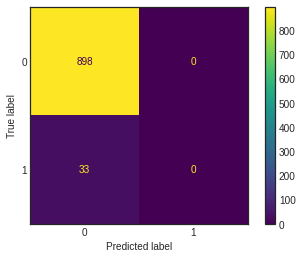

sensitivitynan
Specificity0.9645542427497314


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars



The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


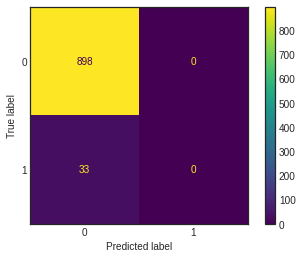

sensitivitynan
Specificity0.9645542427497314


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars



The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


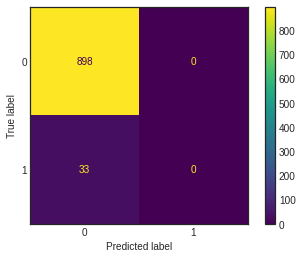

sensitivitynan
Specificity0.9645542427497314


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars



The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


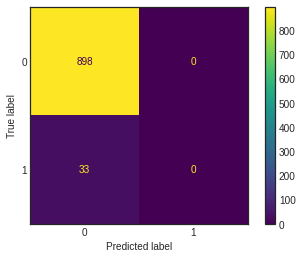

sensitivitynan
Specificity0.9645542427497314


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars



The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


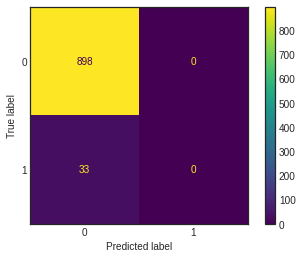

sensitivitynan
Specificity0.9645542427497314


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars



The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


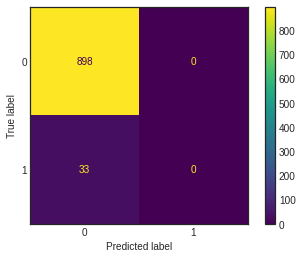

sensitivitynan
Specificity0.9645542427497314


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars



The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


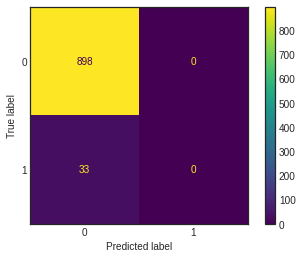

sensitivitynan
Specificity0.9645542427497314


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars



The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


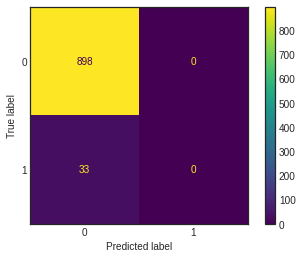

sensitivitynan
Specificity0.9645542427497314


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars



The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


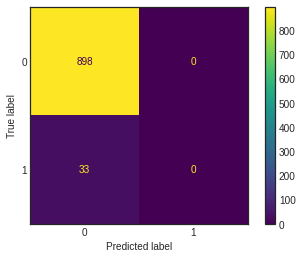

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars


sensitivitynan
Specificity0.9645542427497314

The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


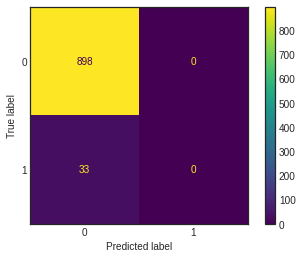

sensitivitynan
Specificity0.9645542427497314


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars



The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


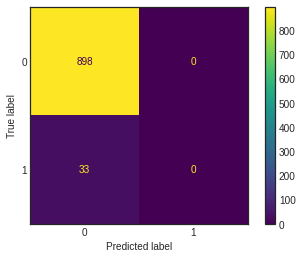

sensitivitynan
Specificity0.9645542427497314


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars



The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


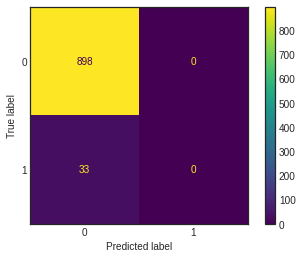

sensitivitynan
Specificity0.9645542427497314


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars



The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


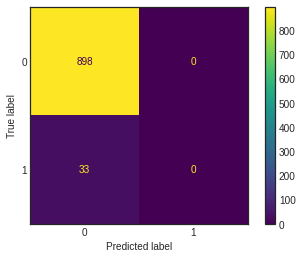

sensitivitynan
Specificity0.9645542427497314


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars



The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


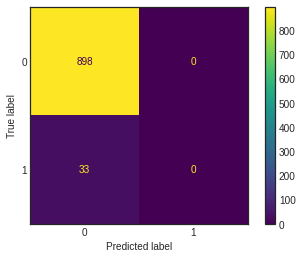

sensitivitynan
Specificity0.9645542427497314


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars



The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


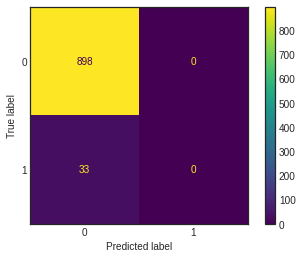

sensitivitynan
Specificity0.9645542427497314


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars



The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


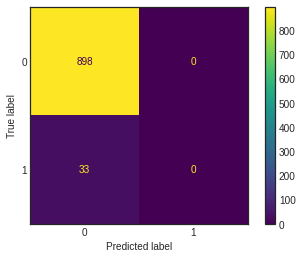

sensitivitynan
Specificity0.9645542427497314


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars



The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


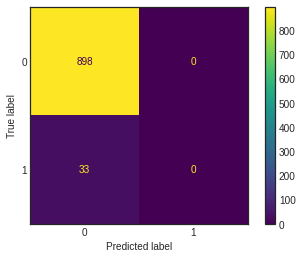

sensitivitynan
Specificity0.9645542427497314


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars



The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


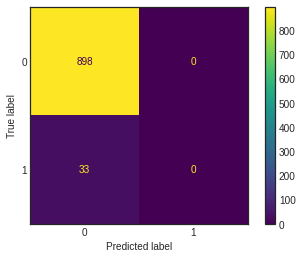

sensitivitynan
Specificity0.9645542427497314


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars



The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


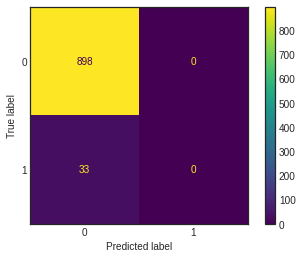

sensitivitynan
Specificity0.9645542427497314


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars



The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


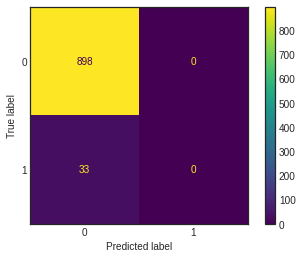

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars


sensitivitynan
Specificity0.9645542427497314

The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


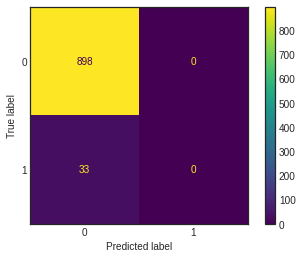

sensitivitynan
Specificity0.9645542427497314


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars



The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


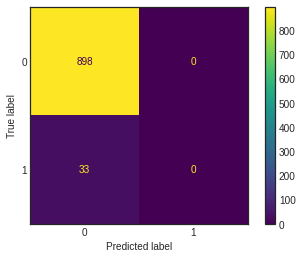

sensitivitynan
Specificity0.9645542427497314


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars



The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


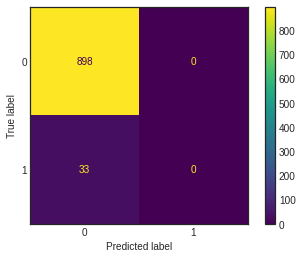

sensitivitynan
Specificity0.9645542427497314


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars



The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


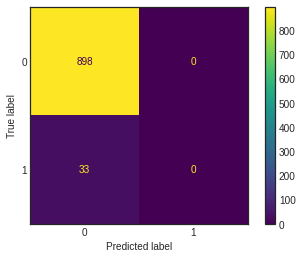

sensitivitynan
Specificity0.9645542427497314


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars



The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


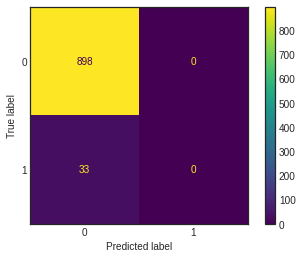

sensitivitynan
Specificity0.9645542427497314


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars



The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


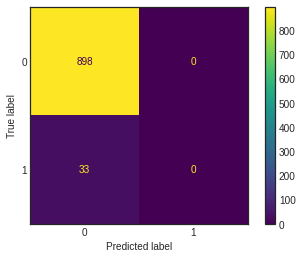

sensitivitynan
Specificity0.9645542427497314


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars



The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


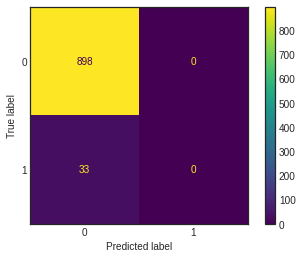

sensitivitynan
Specificity0.9645542427497314


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars



The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


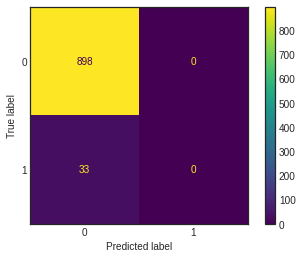

sensitivitynan
Specificity0.9645542427497314


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars



The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


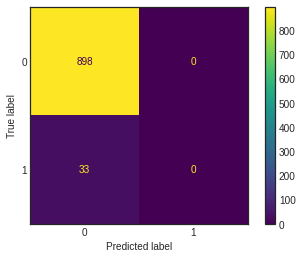

sensitivitynan
Specificity0.9645542427497314


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars



The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


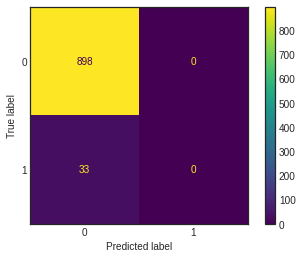

sensitivitynan
Specificity0.9645542427497314


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars



The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


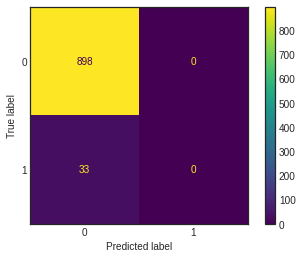

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars


sensitivitynan
Specificity0.9645542427497314

The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


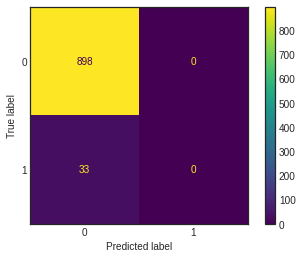

sensitivitynan
Specificity0.9645542427497314


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars



The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


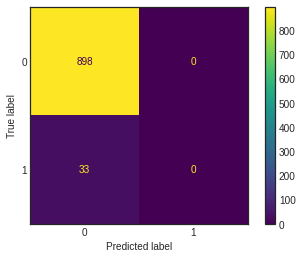

sensitivitynan
Specificity0.9645542427497314


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars



The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


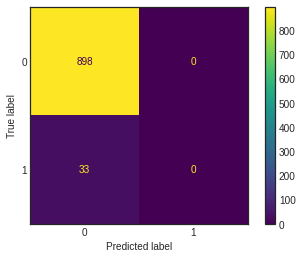

sensitivitynan
Specificity0.9645542427497314


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars



The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


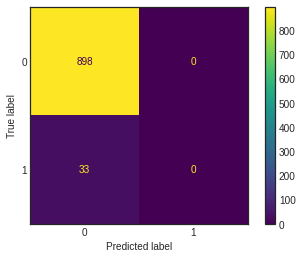

sensitivitynan
Specificity0.9645542427497314


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars



The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


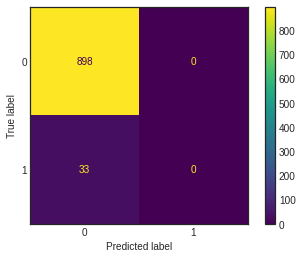

sensitivitynan
Specificity0.9645542427497314


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars



The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


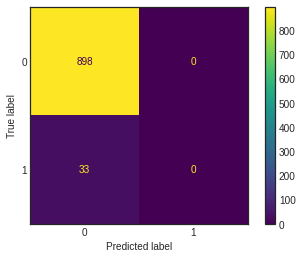

sensitivitynan
Specificity0.9645542427497314


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars



The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


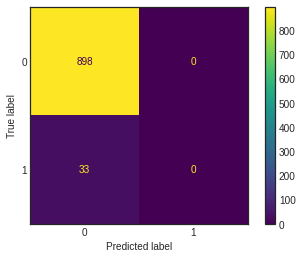

sensitivitynan
Specificity0.9645542427497314


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars



The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


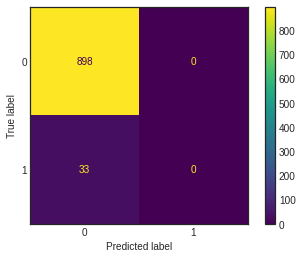

sensitivitynan
Specificity0.9645542427497314


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars



The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


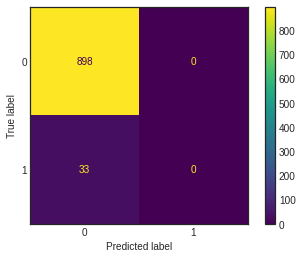

sensitivitynan
Specificity0.9645542427497314


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars



The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


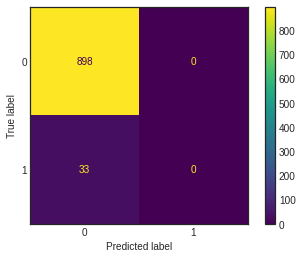

sensitivitynan
Specificity0.9645542427497314


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars



The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


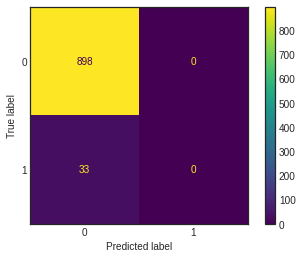

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars


sensitivitynan
Specificity0.9645542427497314

The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


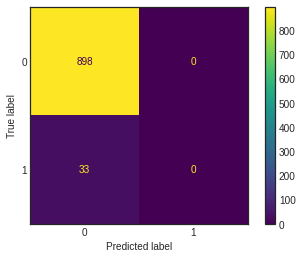

sensitivitynan
Specificity0.9645542427497314


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars



The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


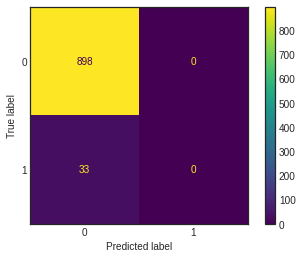

sensitivitynan
Specificity0.9645542427497314


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars



The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


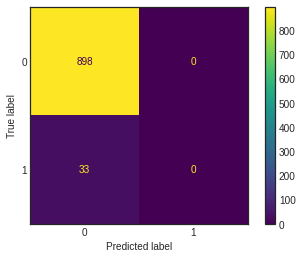

sensitivitynan
Specificity0.9645542427497314


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars



The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


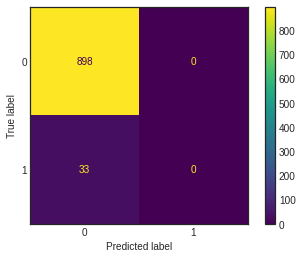

sensitivitynan
Specificity0.9645542427497314


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars



The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


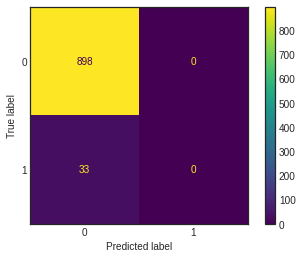

sensitivitynan
Specificity0.9645542427497314


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars



The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


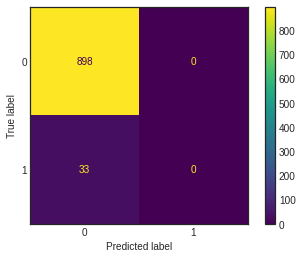

sensitivitynan
Specificity0.9645542427497314


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars



The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


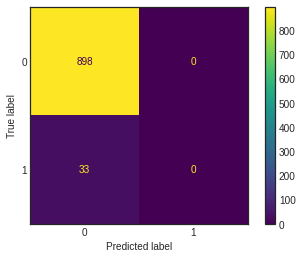

sensitivitynan
Specificity0.9645542427497314


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars



The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


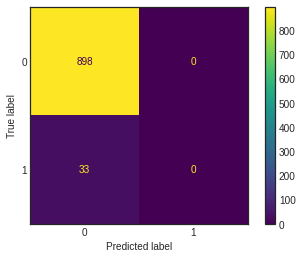

sensitivitynan
Specificity0.9645542427497314


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars



The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


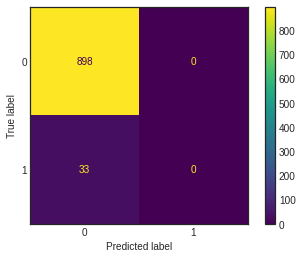

sensitivitynan
Specificity0.9645542427497314


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars



The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


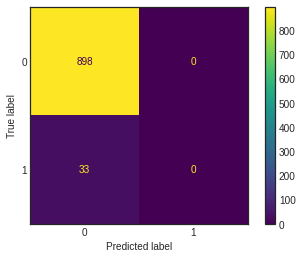

sensitivitynan
Specificity0.9645542427497314


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars



The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


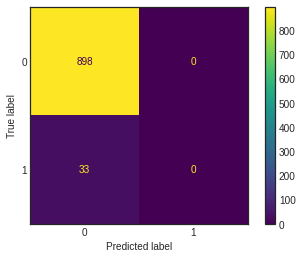

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars


sensitivitynan
Specificity0.9645542427497314

The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


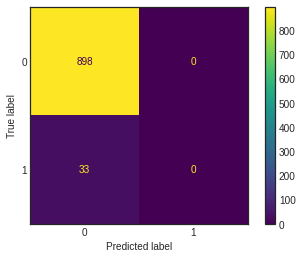

sensitivitynan
Specificity0.9645542427497314


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars



The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


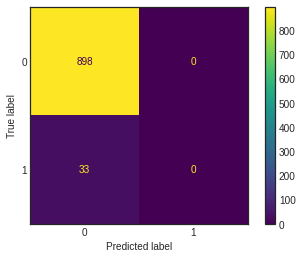

sensitivitynan
Specificity0.9645542427497314


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars



The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


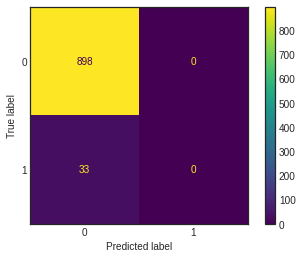

sensitivitynan
Specificity0.9645542427497314


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars



The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


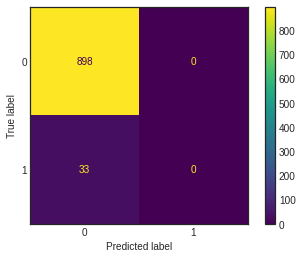

sensitivitynan
Specificity0.9645542427497314


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars



The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


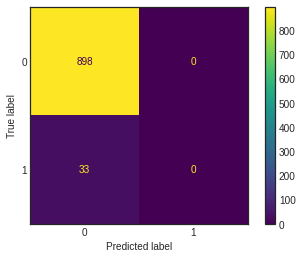

sensitivitynan
Specificity0.9645542427497314


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars



The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


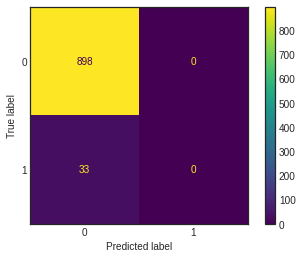

sensitivitynan
Specificity0.9645542427497314


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars



The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


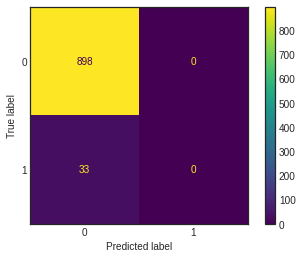

sensitivitynan
Specificity0.9645542427497314


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars



The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


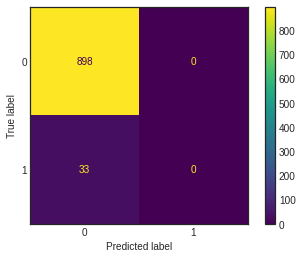

sensitivitynan
Specificity0.9645542427497314


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars



The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


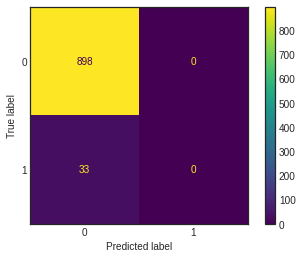

sensitivitynan
Specificity0.9645542427497314


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars



The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


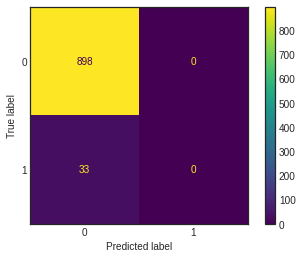

sensitivitynan
Specificity0.9645542427497314


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars



The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


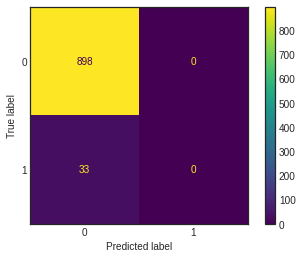

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars


sensitivitynan
Specificity0.9645542427497314

The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


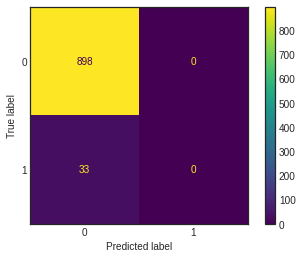

sensitivitynan
Specificity0.9645542427497314


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars



The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


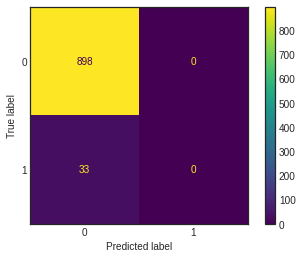

sensitivitynan
Specificity0.9645542427497314


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars



The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


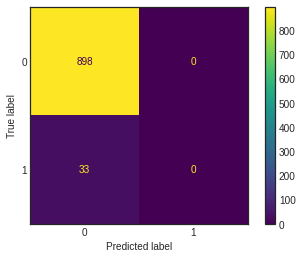

sensitivitynan
Specificity0.9645542427497314


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars



The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


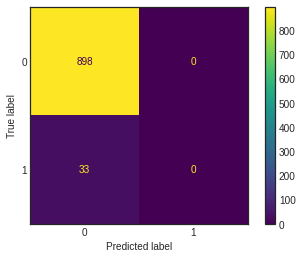

sensitivitynan
Specificity0.9645542427497314


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars



The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


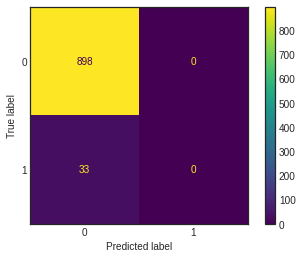

sensitivitynan
Specificity0.9645542427497314


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars



The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


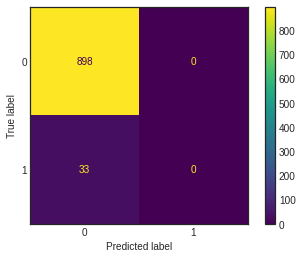

sensitivitynan
Specificity0.9645542427497314


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars



The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


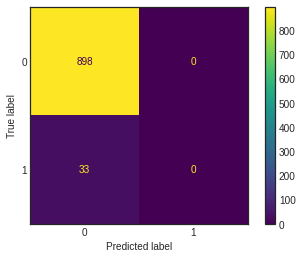

sensitivitynan
Specificity0.9645542427497314


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars



The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


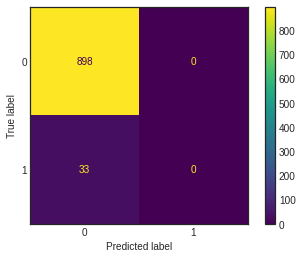

sensitivitynan
Specificity0.9645542427497314


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars



The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


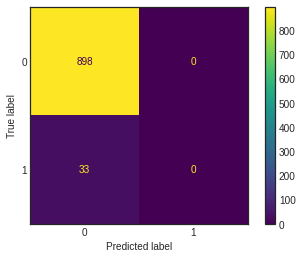

sensitivitynan
Specificity0.9645542427497314


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars



The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


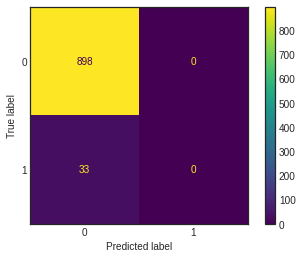

sensitivitynan
Specificity0.9645542427497314


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars



The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


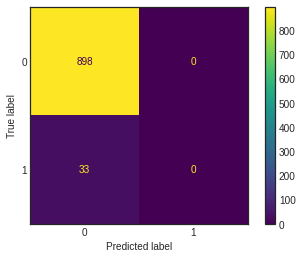

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars


sensitivitynan
Specificity0.9645542427497314

The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


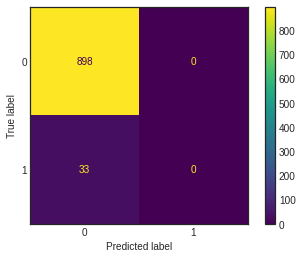

sensitivitynan
Specificity0.9645542427497314


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars



The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


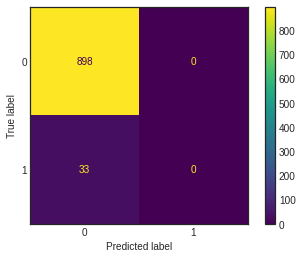

sensitivitynan
Specificity0.9645542427497314


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars



The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


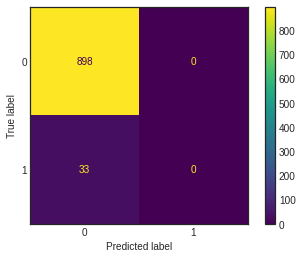

sensitivitynan
Specificity0.9645542427497314


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars



The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


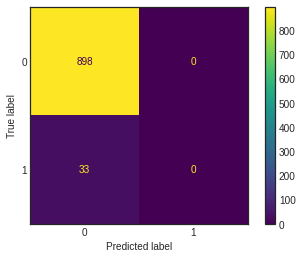

sensitivitynan
Specificity0.9645542427497314


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars



The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


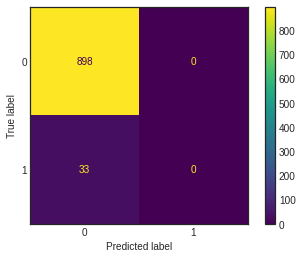

sensitivitynan
Specificity0.9645542427497314


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars



The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


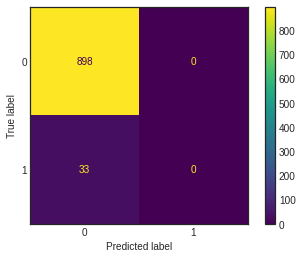

sensitivitynan
Specificity0.9645542427497314


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars



The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


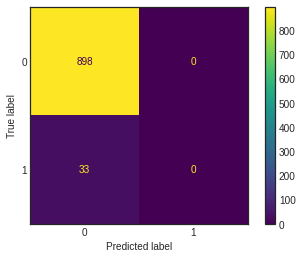

sensitivitynan
Specificity0.9645542427497314


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars



The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


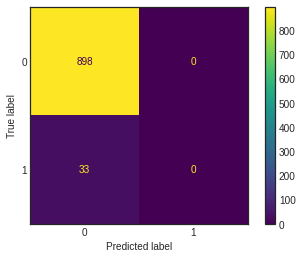

sensitivitynan
Specificity0.9645542427497314


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars



The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


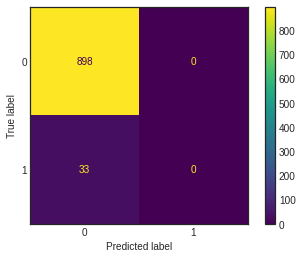

sensitivitynan
Specificity0.9645542427497314


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars



The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


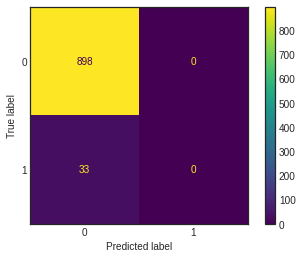

sensitivitynan
Specificity0.9645542427497314


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars



The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


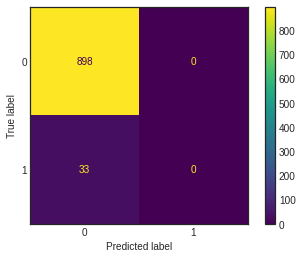

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars


sensitivitynan
Specificity0.9645542427497314

The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


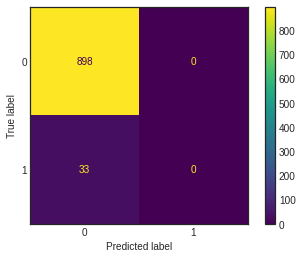

sensitivitynan
Specificity0.9645542427497314


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars



The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


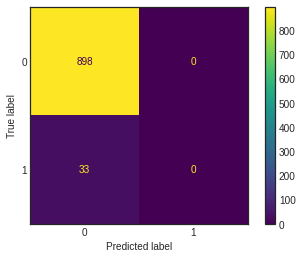

sensitivitynan
Specificity0.9645542427497314


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars



The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


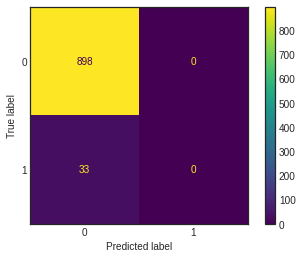

sensitivitynan
Specificity0.9645542427497314


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars



The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


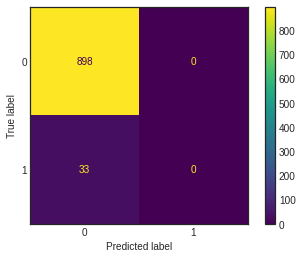

sensitivitynan
Specificity0.9645542427497314


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars



The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


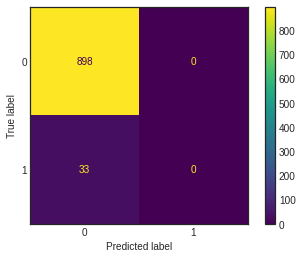

sensitivitynan
Specificity0.9645542427497314


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars



The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


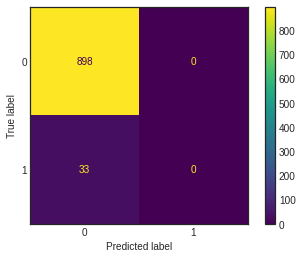

sensitivitynan
Specificity0.9645542427497314


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars



The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


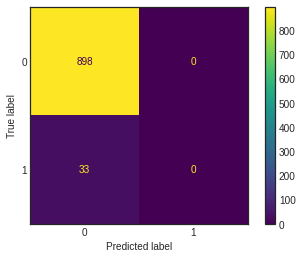

sensitivitynan
Specificity0.9645542427497314


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars



The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


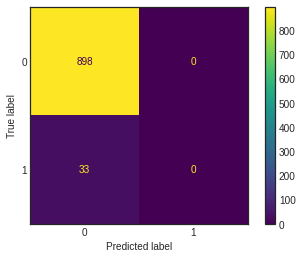

sensitivitynan
Specificity0.9645542427497314


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars



The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


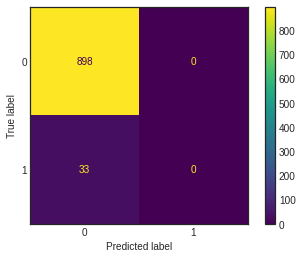

sensitivitynan
Specificity0.9645542427497314


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars



The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


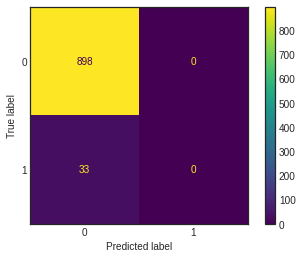

sensitivitynan
Specificity0.9645542427497314


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars



The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


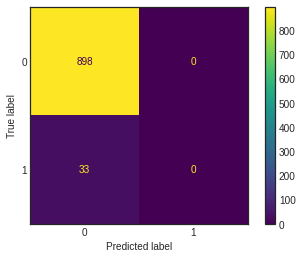

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars


sensitivitynan
Specificity0.9645542427497314

The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


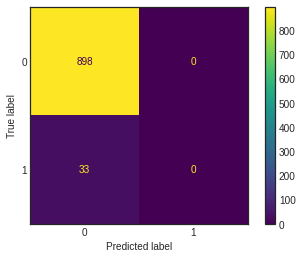

sensitivitynan
Specificity0.9645542427497314


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars



The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


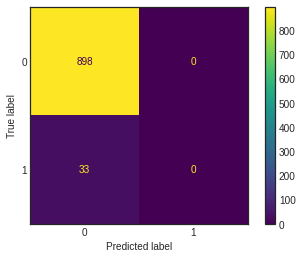

sensitivitynan
Specificity0.9645542427497314


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars



The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


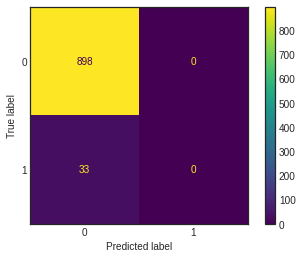

sensitivitynan
Specificity0.9645542427497314


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars



The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


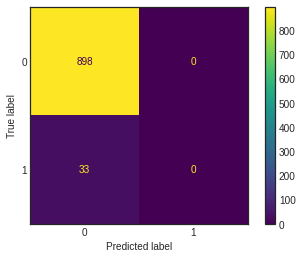

sensitivitynan
Specificity0.9645542427497314


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars



The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


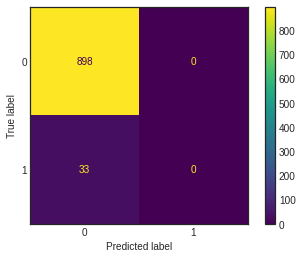

sensitivitynan
Specificity0.9645542427497314


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars



The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


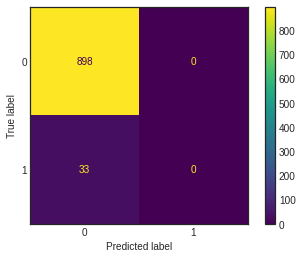

sensitivitynan
Specificity0.9645542427497314


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars



The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


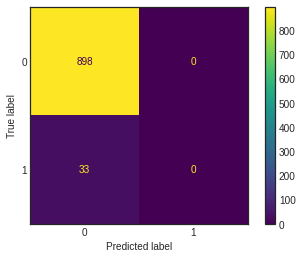

sensitivitynan
Specificity0.9645542427497314


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars



The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


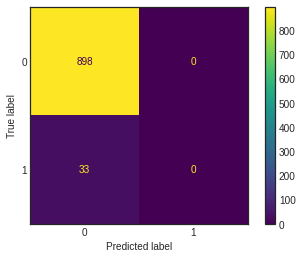

sensitivitynan
Specificity0.9645542427497314


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars



The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


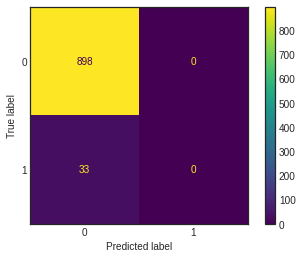

sensitivitynan
Specificity0.9645542427497314


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars



The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


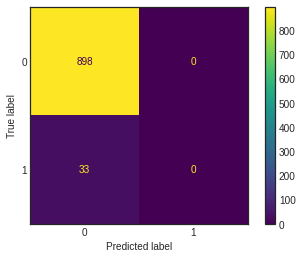

sensitivitynan
Specificity0.9645542427497314


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars



The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


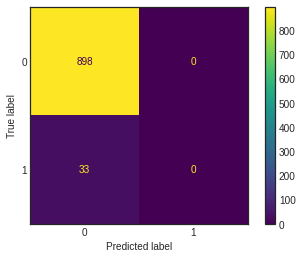

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars


sensitivitynan
Specificity0.9645542427497314

The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


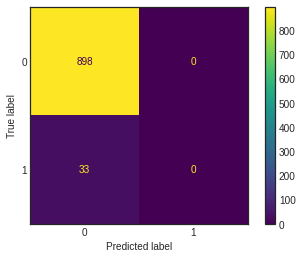

sensitivitynan
Specificity0.9645542427497314


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars



The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


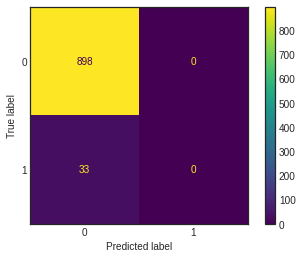

sensitivitynan
Specificity0.9645542427497314


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars



The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


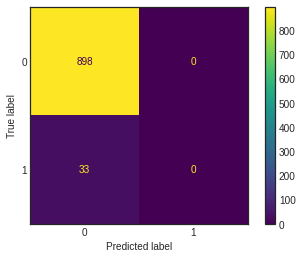

sensitivitynan
Specificity0.9645542427497314


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars



The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


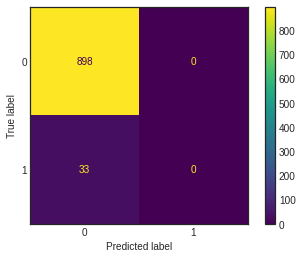

sensitivitynan
Specificity0.9645542427497314


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars



The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


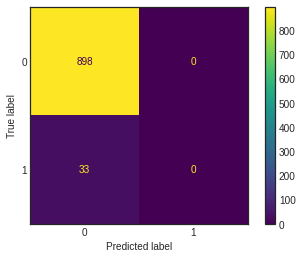

sensitivitynan
Specificity0.9645542427497314


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars



The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


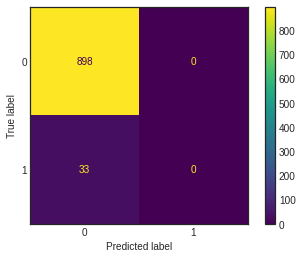

sensitivitynan
Specificity0.9645542427497314


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars



The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


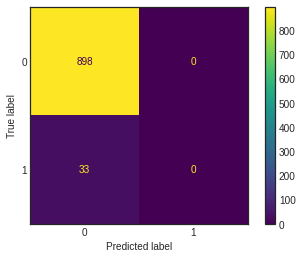

sensitivitynan
Specificity0.9645542427497314


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars



The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


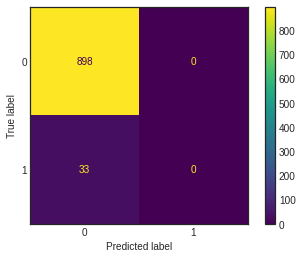

sensitivitynan
Specificity0.9645542427497314


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars



The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


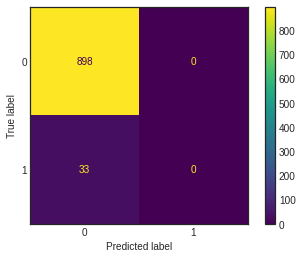

sensitivitynan
Specificity0.9645542427497314


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars



The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


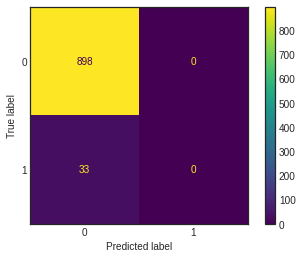

sensitivitynan
Specificity0.9645542427497314


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars



The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


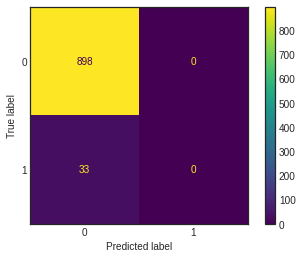

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars


sensitivitynan
Specificity0.9645542427497314

The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


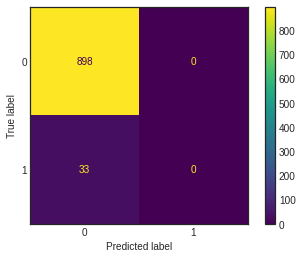

sensitivitynan
Specificity0.9645542427497314


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars



The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


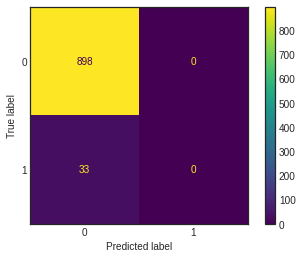

sensitivitynan
Specificity0.9645542427497314


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars



The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


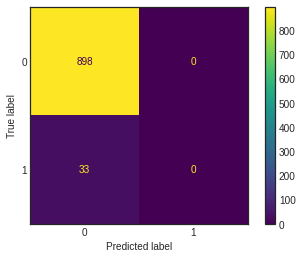

sensitivitynan
Specificity0.9645542427497314


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars



The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


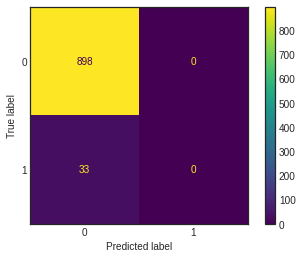

sensitivitynan
Specificity0.9645542427497314


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars



The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


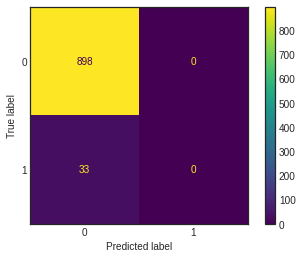

sensitivitynan
Specificity0.9645542427497314


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars



The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


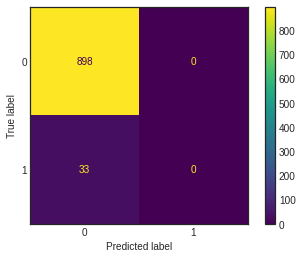

sensitivitynan
Specificity0.9645542427497314


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars



The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


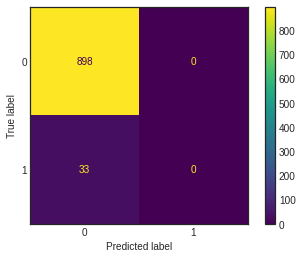

sensitivitynan
Specificity0.9645542427497314


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars



The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


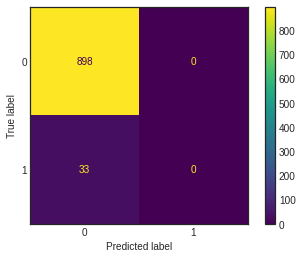

sensitivitynan
Specificity0.9645542427497314


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars



The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


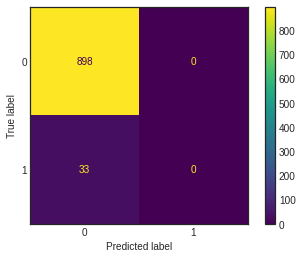

sensitivitynan
Specificity0.9645542427497314


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars



The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


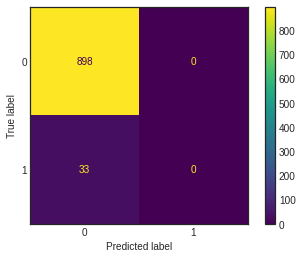

sensitivitynan
Specificity0.9645542427497314


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars



The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


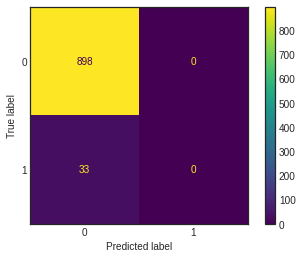

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars


sensitivitynan
Specificity0.9645542427497314

The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


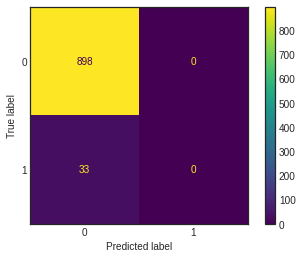

sensitivitynan
Specificity0.9645542427497314


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars



The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


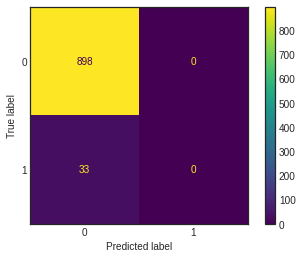

sensitivitynan
Specificity0.9645542427497314


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars



The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


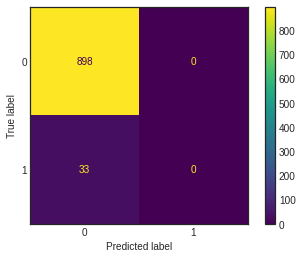

sensitivitynan
Specificity0.9645542427497314


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars



The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


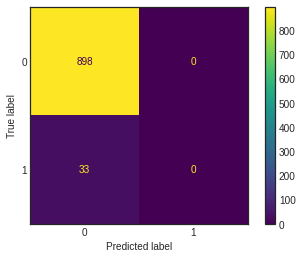

sensitivitynan
Specificity0.9645542427497314


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars



The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


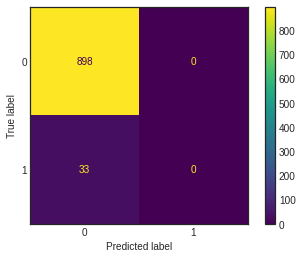

sensitivitynan
Specificity0.9645542427497314


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars



The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


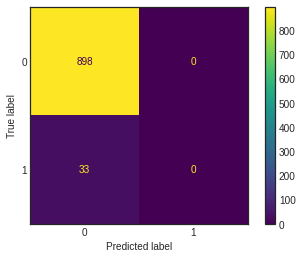

sensitivitynan
Specificity0.9645542427497314


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars



The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


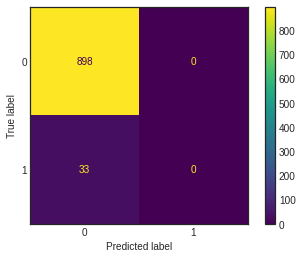

sensitivitynan
Specificity0.9645542427497314


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars



The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


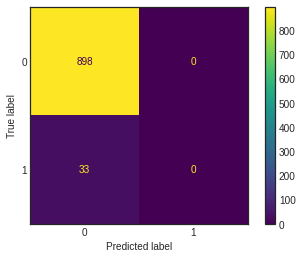

sensitivitynan
Specificity0.9645542427497314


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars



The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


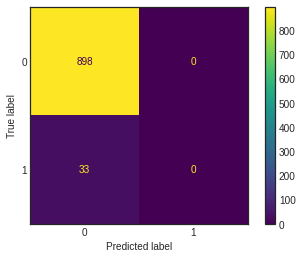

sensitivitynan
Specificity0.9645542427497314


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars



The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


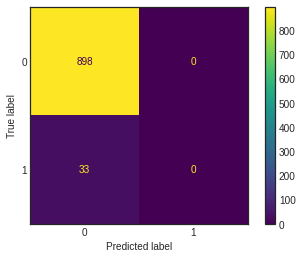

sensitivitynan
Specificity0.9645542427497314


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars



The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


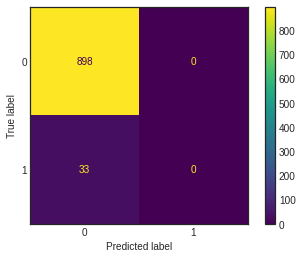

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars


sensitivitynan
Specificity0.9645542427497314

The accuracy:  0.9645542427497314
Predicted    0  1
True             
0          898  0
1           33  0


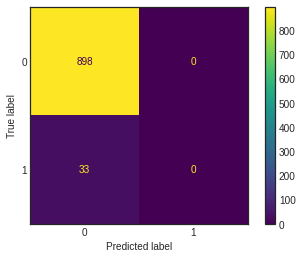

sensitivitynan
Specificity0.9645542427497314


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars


In [8]:

ac_list=[]
k=[]
sensitivity=[] #TP / (TP+FN)
Specificity=[] #TN / (TN+FP)
for i in range(1,201):
  K_nearest (i, X_train, y_train_Amacrine,X_test,y_test_Amacrine)

##Accuracy,Sensitivity and Specificity

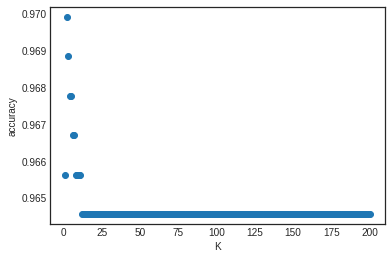

In [9]:
plt.scatter(x=k,y=ac_list)
plt.xlabel("K")
plt.ylabel("accuracy")
plt.show()

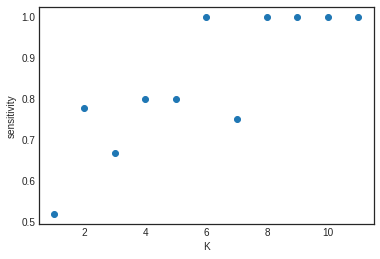

In [10]:
#sensitivity
plt.scatter(x=k,y=sensitivity)
plt.xlabel("K")
plt.ylabel("sensitivity")
plt.show()

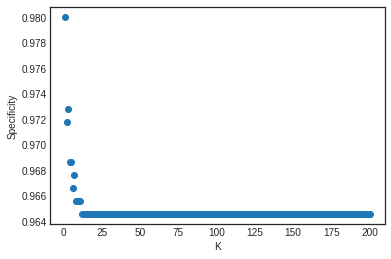

In [11]:
#Specificity
plt.scatter(x=k,y=Specificity)
plt.xlabel("K")
plt.ylabel("Specificity")
plt.show()

In [12]:
columns_name=list(dataweek1.columns)[:-5]
#check number of classes
#'Cone Bipolar ON' :0, 'Cone Bipolar OFF' :1, 'Rod Bipolar' :2, 'Amacrine' :3
dataweek1["CLASS"].unique()
y_full=dataweek1
y_full["CLASS"] = y_full["CLASS"].map({'Cone Bipolar ON' :0, 'Cone Bipolar OFF' :1, 'Rod Bipolar' :2, 'Amacrine' :3}).astype(int)

In [13]:
y_full["CLASS"].unique()

array([0, 1, 2, 3])

In [14]:
x=dataweek1[columns_name].values
y=y_full["CLASS"].values
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=1,test_size=0.25)
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

Predicted    0    1    2   3
True                        
0          337   17    5   0
1           13  407    1   0
2            0    1  117   0
3            4   10    1  18


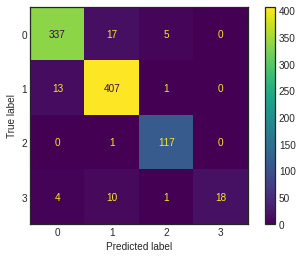

In [15]:
ypred_test=knn.predict(X_test)
conf_m = confusion_matrix(y_test, ypred_test, labels=knn.classes_)
conf_pd = pd.DataFrame(conf_m,index=knn.classes_, columns=knn.classes_)
conf_pd.index.name = 'True'
conf_pd.columns.name = 'Predicted'
print(conf_pd)
conf_m_display = ConfusionMatrixDisplay(conf_m,).plot()
plt.show()

##predict the unlabeled data

In [16]:
#import data
data_unlabeled=pd.read_csv("./data/data_unlabeled_fixed2022.csv")
#remove - in name
data_unlabeled.columns = data_unlabeled.columns.str.replace("-", "")

In [18]:
x_unlabel=data_unlabeled[columns_name].values
y_unlabel=knn.predict(x_unlabel)

In [19]:
#'Cone Bipolar ON' :0, 'Cone Bipolar OFF' :1, 'Rod Bipolar' :2, 'Amacrine' :3
print('the number of class Cone Bipolar ON ={}'.format(np.sum(y_unlabel==0)))
print('the number of class Cone Bipolar OFF ={}'.format(np.sum(y_unlabel==1)))
print('the number of class Rod Bipolar ={}'.format(np.sum(y_unlabel==2)))
print('the number of class Amacrine ={}'.format(np.sum(y_unlabel==3)))

the number of class Cone Bipolar ON =1327
the number of class Cone Bipolar OFF =2121
the number of class Rod Bipolar =1337
the number of class Amacrine =116
